In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the data
JC240_data = pd.read_csv("JC240_data.csv")
JC241_data = pd.read_csv("JC241_data.csv")

# Explore the data
JC240_data.head() # show data = sanity check
JC241_data.head(100)
# JC240_data.info() # Index, data type, and memory information

,Session_ID,Flavor,Arm,Correct,CorrectBool
0,1,H,3,N,0
1,1,H,7,Y,1
2,1,H,4,N,0
3,1,H,7,Y,1
4,1,H,2,N,0
...,...,...,...,...,...
95,3,H,3,N,0
96,3,H,7,Y,1
97,3,H,3,N,0
98,3,C,7,N,0


In [2]:
# Split the data by Session ID
sessionID_JC240 = JC240_data["Session_ID"].unique() # returns an array of unique session IDs
numSessions_JC240 = len(sessionID_JC240)
numTrials_JC240 = JC240_data.groupby("Session_ID").size() # lists the number of trials per session
# session1 = JC240_data.loc[JC240_data.Session_ID==1]
# print(session1.CorrectBool)
# print(numTrials)

sessionID_JC241 = JC241_data["Session_ID"].unique() # returns an array of unique session IDs
numSessions_JC241 = len(sessionID_JC241)
numTrials_JC241 = JC241_data.groupby("Session_ID").size() # lists the number of trials per session

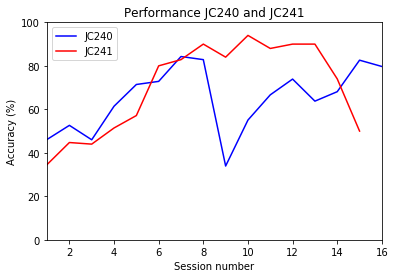

In [3]:
# Calculate all correct trials
# print(sessionID)
correctTrials_JC240 = np.zeros((1, numSessions_JC240))
for idx in range(1, numSessions_JC240+1):
        session = JC240_data.loc[JC240_data.Session_ID==idx]
        correctTrials_JC240[0,idx-1] = sum(session.CorrectBool)
        
correctTrials_JC241 = np.zeros((1, numSessions_JC241))
for idx in range(1, numSessions_JC241+1):
        session = JC241_data.loc[JC241_data.Session_ID==idx]
        correctTrials_JC241[0,idx-1] = sum(session.CorrectBool)
        
accuracy_JC240 = (correctTrials_JC240/numTrials_JC240.values)*100 # session accuracy in percent
accuracy_JC241 = (correctTrials_JC241/numTrials_JC241.values)*100
JC240_plot = plt.plot(sessionID_JC240, accuracy_JC240[0,:], 'b', label="JC240")
JC241_plot = plt.plot(sessionID_JC241, accuracy_JC241[0,:], 'r', label="JC241")
plt.xlabel('Session number')
plt.ylabel('Accuracy (%)')
plt.title('Performance JC240 and JC241')
plt.legend()

plt.axis([1,16,0,100])
plt.show()